In [1]:
from pylab import *

In [7]:
def malla_cuad_circ(x,y,r=0.5):
    N , M = len(x) , len(y) # i,j
    malla = zeros((N,M))
    for i in range(N):
        for j in range(M):
            if sqrt( x[i]**2 + y[j]**2) < r:
                malla[i,j] = 1
    return malla

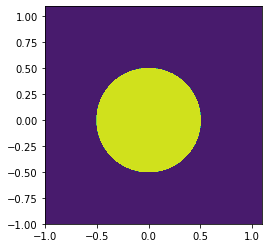

In [11]:
x = arange(-1,1.1,0.0025)
y = arange(-1,1.1,0.0025)
XX , YY = meshgrid(x,y)
V = malla_cuad_circ(x,y)
contourf(XX,YY,V)
gca().set_aspect('equal')
show()